In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
#r.gROOT.Macro( '/home/jlab/rootlogon.C' ) 

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./gm2offline_ana_7893458_15937.00027.root")
f.cd("clusterTree")
f.ls()

TFile**		./gm2offline_ana_7893458_15937.00027.root	
 TFile*		./gm2offline_ana_7893458_15937.00027.root	
  TDirectoryFile*		clusterTree	clusterTree (ClusterTree) folder
   KEY: TTree	clusters;94	clusters
   KEY: TTree	clusters;93	clusters
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


In [3]:
t = f.Get("clusterTree").Get("clusters")

In [4]:
t.Print()

******************************************************************************
*Tree    :clusters  : clusters                                               *
*Entries : 99870478 : Total =      6791534622 bytes  File  Size = 2795647272 *
*        :          : Tree compression factor =   2.43                       *
******************************************************************************
*Br    0 :energy    : energy/D                                               *
*Entries : 99870478 : Total  Size=  798999061 bytes  File Size  =  760531572 *
*Baskets :      360 : Basket Size=   25600000 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :time      : time/D                                                 *
*Entries : 99870478 : Total  Size=  798998333 bytes  File Size  =  762480670 *
*Baskets :      360 : Basket Size=   25600000 bytes  Compression=   1.05     *
*...................................................

In [5]:
x = 0
e1 = 0
energyrange = 100
e2 = e1+energyrange
num = 30
list2 = []
listenergy = []
while x < num:
    string = "caloNum == 7 && energy > "+str(e1)+" && energy < "+str(e2)+" && time>10000 && time <500000"
    list2.append(string)
    listenergy.append(str(e1)+" MeV - "+str(e2)+" MeV")
    x = x+1
    e1 = e2
    e2 = e2+energyrange
print(list2)
print(listenergy)

['caloNum == 7 && energy > 0 && energy < 100 && time>10000 && time <500000', 'caloNum == 7 && energy > 100 && energy < 200 && time>10000 && time <500000', 'caloNum == 7 && energy > 200 && energy < 300 && time>10000 && time <500000', 'caloNum == 7 && energy > 300 && energy < 400 && time>10000 && time <500000', 'caloNum == 7 && energy > 400 && energy < 500 && time>10000 && time <500000', 'caloNum == 7 && energy > 500 && energy < 600 && time>10000 && time <500000', 'caloNum == 7 && energy > 600 && energy < 700 && time>10000 && time <500000', 'caloNum == 7 && energy > 700 && energy < 800 && time>10000 && time <500000', 'caloNum == 7 && energy > 800 && energy < 900 && time>10000 && time <500000', 'caloNum == 7 && energy > 900 && energy < 1000 && time>10000 && time <500000', 'caloNum == 7 && energy > 1000 && energy < 1100 && time>10000 && time <500000', 'caloNum == 7 && energy > 1100 && energy < 1200 && time>10000 && time <500000', 'caloNum == 7 && energy > 1200 && energy < 1300 && time>1000

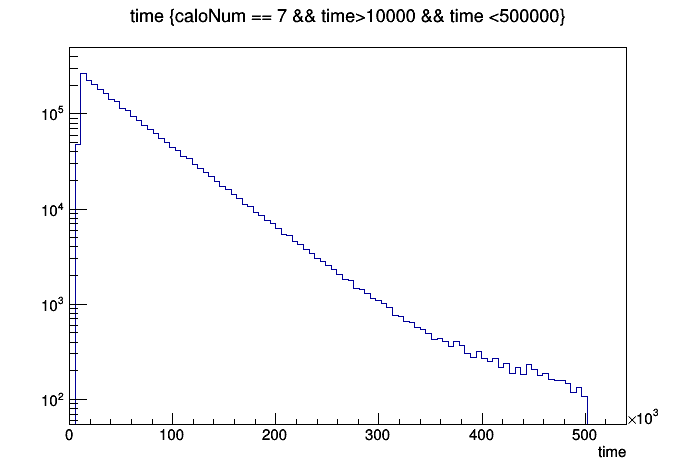

In [6]:
c = r.TCanvas()
c.SetLogy()
#t.Draw("time",list2[1],"")
#t.Draw("energy","caloNum == 7 && time>10000 && time <500000","")
t.Draw("time","caloNum == 7 && time>10000 && time <500000","")
c.Draw()

In [ ]:
c = r.TCanvas()
c.SetLogy()
h = r.TH1D("h",listenergy[0],600,0,600000)
h.SetMarkerColor(1)
h.SetMarkerStyle(8)
h.SetLineColor(1)
h.SetMarkerSize(.25)
t.Draw("time>>h",list2[0],"goff")
h.GetYaxis().SetRangeUser(.01,100000)
h.Draw("E0 P0")
leg = r.TLegend(0.1,0.7,0.48,0.9)
leg.AddEntry("h",listenergy[0],"pl")
leg.SetNColumns(2)
i = 0
h2 = r.TH1D("h2","h2",600,0,600000)
while i < len(list2):
    i = i+1
    h2.SetMarkerColor(i+2)
    h2.SetLineColor(i+2)
    h2.SetMarkerStyle(8)
    h2.SetMarkerSize(.25)
    h2.SetTitle(listenergy[i])
    t.Draw("time>>h2",list2[i],"goff")
    h2.DrawCopy("P0 E0 SAME")
    leg.AddEntry(h2,listenergy[i],"pl")
#leg.Draw("SAME")
c.BuildLegend()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Info in <TCanvas::Print>: png file ./timeSpectrum/0 MeV - 100 MeV.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/100 MeV - 200 MeV.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/200 MeV - 300 MeV.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/300 MeV - 400 MeV.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/400 MeV - 500 MeV.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/500 MeV - 600 MeV.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/600 MeV - 700 MeV.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/700 MeV - 800 MeV.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/800 MeV - 900 MeV.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/900 MeV - 1000 MeV.png has been created
Info in <TCanvas::Prin

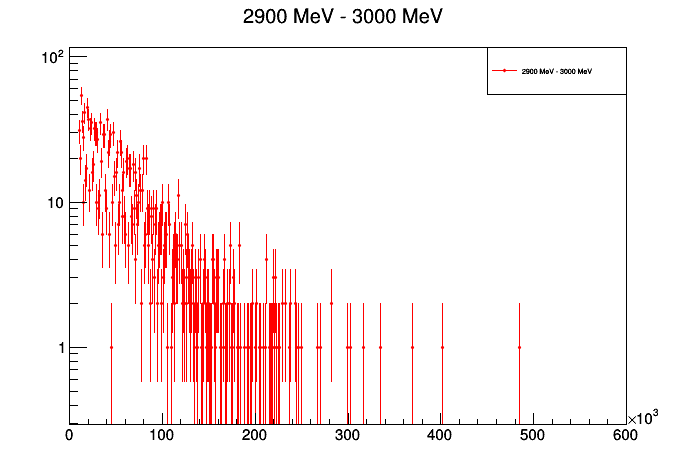

In [9]:
c2 = r.TCanvas()
c2.SetLogy()
i = 0
h2 = r.TH1D("h2","h2",600,0,600000)
h2.SetMarkerColor(2)
h2.SetLineColor(2)
h2.SetMarkerStyle(8)
h2.SetMarkerSize(.25)
while i < len(list2):
    h2.SetTitle(listenergy[i])
    t.Draw("time>>h2",list2[i],"goff")
    h2.DrawCopy("P0 E0")
    leg = r.TLegend(0.7,0.8,0.9,0.9)
    leg.AddEntry(h2,listenergy[i],"pl")
    leg.Draw("SAME")
    #c.BuildLegend()
    c2.Draw()
    ding = "./timeSpectrum/"+listenergy[i]+".png"
    c2.Print(ding)
    i = i+1

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Info in <TCanvas::Print>: png file ./timeSpectrum/0.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/1.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/2.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/3.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/4.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/5.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/6.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/7.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/8.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/9.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/10.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/11.png has been created
Info in <TCanvas::Print>: png fil

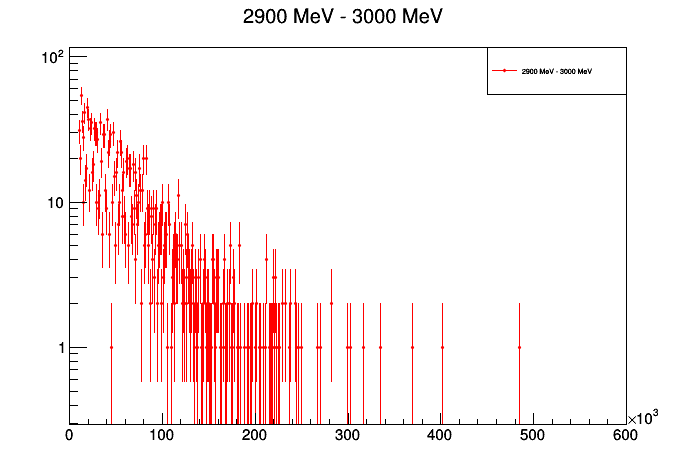

In [ ]:
c2 = r.TCanvas()
c2.SetLogy()
i = 0
h2 = r.TH1D("h2","h2",600,0,600000)
h2.SetMarkerColor(2)
h2.SetLineColor(2)
h2.SetMarkerStyle(8)
h2.SetMarkerSize(.25)
while i < len(list2):
    h2.SetTitle(listenergy[i])
    t.Draw("time>>h2",list2[i],"goff")
    h2.DrawCopy("P0 E0")
    leg = r.TLegend(0.7,0.8,0.9,0.9)
    leg.AddEntry(h2,listenergy[i],"pl")
    leg.Draw("SAME")
    #c.BuildLegend()
    c2.Draw()
    ding = "./timeSpectrum/"+str(i)+".png"
    c2.Print(ding)
    i = i+1

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/0norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/1norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/2norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/3norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/4norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/5norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/6norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/7norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/8norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/9norm.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/norm/10norm.png has been created
Info in 

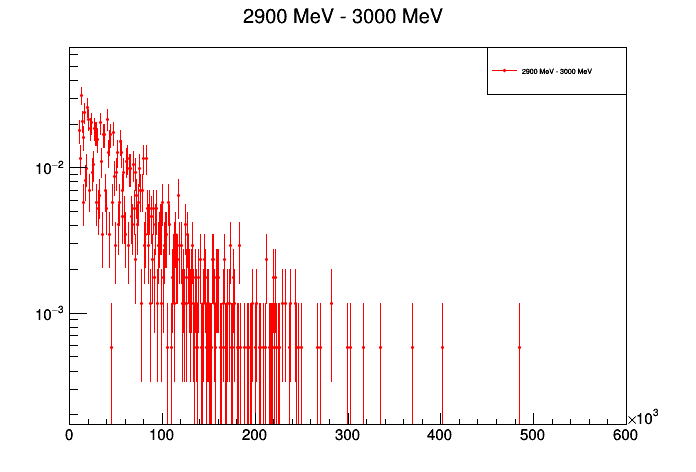

In [12]:
c2 = r.TCanvas()
c2.SetLogy()
i = 0
h2 = r.TH1D("h2","h2",600,0,600000)
h2.SetMarkerColor(2)
h2.SetLineColor(2)
h2.SetMarkerStyle(8)
h2.SetMarkerSize(.25)
while i < len(list2):
    h2.SetTitle(listenergy[i])
    t.Draw("time>>h2",list2[i],"goff")
    norm = h2.GetEntries()
    h2.Scale(1/norm)
    h2.DrawCopy("P0 E0")
    leg = r.TLegend(0.7,0.8,0.9,0.9)
    leg.AddEntry(h2,listenergy[i],"pl")
    leg.Draw("SAME")
    #c.BuildLegend()
    c2.Draw()
    ding = "./timeSpectrum/norm/"+str(i)+"norm.png"
    c2.Print(ding)
    i = i+1

Now lets zoom in on the area from 30 - 74 #mus

In [5]:
x = 0
e1 = 0
energyrange = 100
e2 = e1+energyrange
t1 = 30*1000/1.25
t2 = 74*1000/1.25
num = 30
list2 = []
listenergy = []
while x < num:
    string = "caloNum == 7 && energy > "+str(e1)+" && energy < "+str(e2)+" && time>"+str(t1)+" && time <"+str(t2)
    list2.append(string)
    listenergy.append(str(e1)+" MeV - "+str(e2)+" MeV")
    x = x+1
    e1 = e2
    e2 = e2+energyrange
print(list2)
print(listenergy)

['caloNum == 7 && energy > 0 && energy < 100 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 100 && energy < 200 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 200 && energy < 300 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 300 && energy < 400 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 400 && energy < 500 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 500 && energy < 600 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 600 && energy < 700 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 700 && energy < 800 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 800 && energy < 900 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 900 && energy < 1000 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 1000 && energy < 1100 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy > 1100 && energy < 1200 && time>24000.0 && time <59200.0', 'caloNum == 7 && energy 

Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/0_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/1_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/2_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/3_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/4_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/5_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/6_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/7_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/8_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/9_zoom_30_75.png has been created
Info in <TCanvas::Print>: png file ./timeSpectrum/zoom/10_zoom_30_75.png has been created
Info in <TCanvas::Pr

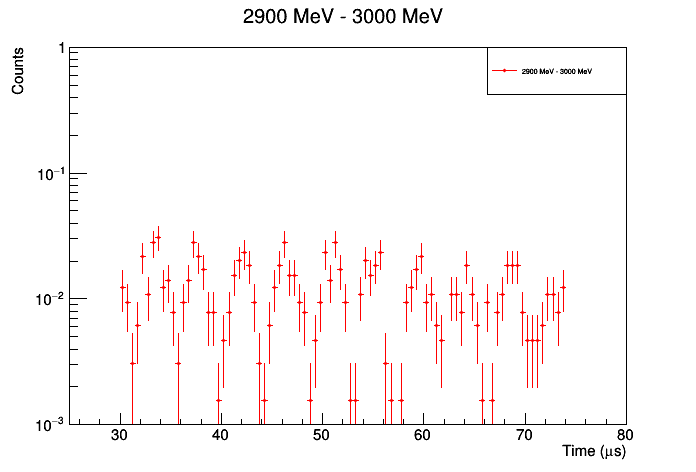

In [11]:
c2 = r.TCanvas()
c2.SetLogy()
i = 0
h2 = r.TH1D("h2","h2",110,25,80)
h2.SetMarkerColor(2)
h2.SetLineColor(2)
h2.SetMarkerStyle(8)
h2.SetMarkerSize(.25)
while i < len(list2):
    dong = listenergy[i]+"; Time (#mus); Counts"
    h2.SetTitle(dong)
    t.Draw("time*1.25/1000>>h2",list2[i],"goff")
    norm = h2.GetEntries()
    h2.Scale(1/norm)
    h2.GetYaxis().SetRangeUser(.001,1)
    h2.DrawCopy("P0 E0")
    leg = r.TLegend(0.7,0.8,0.9,0.9)
    leg.AddEntry(h2,listenergy[i],"pl")
    leg.Draw("SAME")
    #c.BuildLegend()
    c2.Draw()
    ding = "./timeSpectrum/zoom/"+str(i)+"_zoom_30_75.png"
    c2.Print(ding)
    i = i+1

 FCN=14869.7 FROM MIGRAD    STATUS=CONVERGED      47 CALLS          48 TOTAL
                     EDM=7.70695e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant    -3.78172e+00   6.82912e-03   9.96304e-05   6.99257e-04
   2  Slope       -1.44859e-02   1.33235e-04   1.94377e-06  -5.80199e-02


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).


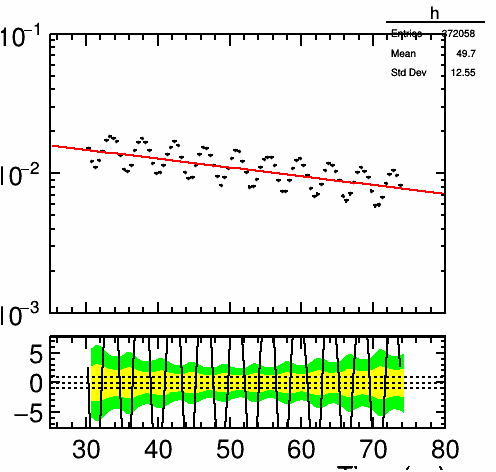

In [9]:
c = r.TCanvas()
c.SetLogy()
dong = "caloNum == 7 && energy > 1300 && energy < 3000; Time (#mus); Counts/Norm"
h = r.TH1D("h",dong,110,25,80)
h.SetMarkerColor(1)
h.SetMarkerStyle(8)
h.SetLineColor(1)
h.SetMarkerSize(.25)
t.Draw("time*1.25/1000>>h","caloNum == 7 && energy > 1300 && energy < 3000 && time>24000.0 && time <59200.0","goff")
norm = h.GetEntries()
h.Scale(1/norm)
h.GetYaxis().SetRangeUser(.001,.1)
h.Draw("E0 P0")
#fit1 = r.TF1("fit1","[0]*(1+ TMath::Exp([1]*x)*TMath::Cos([2]*x+[3])))",30,80)
#fit1.SetParameter(2,.0018)
#fit1.SetParameter(3,3)
#h.Fit("fit1")
h.Fit("expo")
#fit1.Draw("SAME")
rp1 = r.TRatioPlot(h)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("ratio")
h.SetTitle("")
#c.BuildLegend()
c.Draw()